In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
df = pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df.shape

(1000, 21)

In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [5]:
from sklearn.model_selection import train_test_split
df1 , df2 = train_test_split(df, test_size=0.50 , random_state=1)
df1.reset_index(drop=True,inplace=True)

In [6]:
df1.shape

(500, 21)

In [7]:
df2.shape

(500, 21)

In [8]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
# Print Shape of model data
df1.shape

df1.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [10]:
df_new = pd.get_dummies(df1, columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])

In [11]:
df_new.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,1,40,5998,4,3,27,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,0,21,571,4,4,65,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
2,0,12,409,3,3,42,2,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,12,1264,4,4,57,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
4,1,24,4110,3,4,23,2,2,0,1,...,0,1,0,1,0,0,1,0,0,1


In [12]:
df_new.dtypes

default                                                                       int64
duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_0 <= ... < 200 DM                                        uint8
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                    

### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
df_new.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,0.119061,0.266244,...,-0.083858,0.095812,-0.007669,-0.004743,-0.006760,0.014965,0.066688,-0.066688,-0.071374,0.071374
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.047948,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,0.005908,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.119061,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,0.266244,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024


In [14]:
df1.corr().abs().unstack().sort_values(ascending = False)

people_under_maintenance    people_under_maintenance      1.000000
credits_this_bank           credits_this_bank             1.000000
duration_in_month           duration_in_month             1.000000
credit_amount               credit_amount                 1.000000
installment_as_income_perc  installment_as_income_perc    1.000000
present_res_since           present_res_since             1.000000
age                         age                           1.000000
default                     default                       1.000000
duration_in_month           credit_amount                 0.621934
credit_amount               duration_in_month             0.621934
age                         present_res_since             0.273547
present_res_since           age                           0.273547
credit_amount               installment_as_income_perc    0.215371
installment_as_income_perc  credit_amount                 0.215371
duration_in_month           default                       0.15

In [15]:
# We could see from the correlation matrix that "duration_in_month" and "credit_amount" are highly correlated among the other attributes. 

### Drop the original variables which are converted to dummy

In [16]:
#Already saved the values with dummies into an new dataframe hence it will not have any original variables to drop

In [17]:
df_new.isnull().values.any()

False

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 62 columns):
default                                                                       500 non-null int64
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status_<

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [19]:
X = df_new.drop('default', axis=1)
y= df_new.pop('default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [20]:
print("Xtrain:",X_train.isna().values.any())
print("Xtest:",X_test.isna().values.any())
print("Ytrain:",y_train.isna().values.any())
print("Ytest:",y_test.isna().values.any())
##df_new.isna().values.any()

Xtrain: False
Xtest: False
Ytrain: False
Ytest: False


In [21]:
X_test.shape

(150, 61)

In [22]:
X_train.shape

(350, 61)

In [23]:
y_test.shape

(150,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [24]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\hp\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
rfcl = RandomForestClassifier(n_jobs=2,n_estimators = 500, criterion ='entropy',random_state=9999)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [26]:
from sklearn import metrics
y_predict=rfcl.predict(X_test)
Score=rfcl.score(X_test, y_test)
print(Score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7533333333333333
[[96  8]
 [29 17]]


### Q6 Show the list of the features importance( 1 Marks)

In [27]:
importances = rfcl.feature_importances_
importances

array([0.06112767, 0.09933503, 0.04220622, 0.03213619, 0.08781319,
       0.01903031, 0.01031466, 0.01547005, 0.02733667, 0.00861822,
       0.04524331, 0.00781943, 0.02242615, 0.00983811, 0.01608262,
       0.0124328 , 0.00589626, 0.0066611 , 0.02477934, 0.01205215,
       0.0148942 , 0.00403403, 0.00211591, 0.01333561, 0.00223354,
       0.00123962, 0.00630173, 0.01653981, 0.01204021, 0.00670521,
       0.01345498, 0.01466532, 0.01872503, 0.0165422 , 0.01339339,
       0.00652272, 0.01619654, 0.00300311, 0.00644314, 0.01427271,
       0.00890242, 0.00960727, 0.0113141 , 0.01394668, 0.01460956,
       0.01710441, 0.01046203, 0.01280681, 0.01705504, 0.00882843,
       0.00969901, 0.0122814 , 0.01016244, 0.01371228, 0.01420415,
       0.00074438, 0.01042982, 0.01328474, 0.01420996, 0.00388469,
       0.00347189])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [29]:
# Use below values
num_folds = 10
seed = 77

In [30]:
#Validate the Random Forest model build above using k fold

In [31]:
kf = KFold(n_splits=10)

In [32]:
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score
kf=KFold(n_splits=10,shuffle=True,random_state=77)
yt = []
yp = []
acc_rf=[]
au1=[]
cm = np.matrix([[0, 0], [0, 0]])
#print(cm)
for train_index,test_index in kf.split(X,y):
    M=RandomForestClassifier(n_jobs=2,n_estimators = 500, criterion ='entropy',random_state=9999)
    Xtrain,Xtest,Ytrain,Ytest=X.iloc[train_index,:],X.iloc[test_index,:],y[train_index],y[test_index]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    yp.append(Y_predict)
    yt.append(Ytest)
    #cm.append(metrics.confusion_matrix(Ytest,Y_predict))
    cm  = cm + (metrics.confusion_matrix(Ytest,Y_predict))
    acc_rf.append(metrics.accuracy_score(Ytest,Y_predict))
    fpr,tpr, _ = roc_curve(Ytest,Y_predict)
    au1.append(auc(fpr, tpr))
    


C:\Users\hp\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
#Calculate Mean score

In [34]:
print("Mean Score:%.2f%% " % np.mean(acc_rf))

Mean Score:0.75% 


In [35]:
# Calculate score standard deviation using std()

In [36]:
np.std(acc_rf)

0.05528109984434102

In [37]:
#Cross Validated Score can be calculated as below
np.mean(cross_val_score(rfcl , X_test , y_test , cv=10))

0.7149404761904762

# Q8 Print the confusion matrix( 1 Marks)

In [38]:
#to print the confusion matrix for K-fold we take the sum of confusion matrix in each fold
print(cm)

[[318  26]
 [ 98  58]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [39]:
crp=metrics.classification_report(y_test, y_predict)
print(crp)

             precision    recall  f1-score   support

          0       0.77      0.92      0.84       104
          1       0.68      0.37      0.48        46

avg / total       0.74      0.75      0.73       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [40]:
#Hint: Use roc_curve

0.6463210702341138


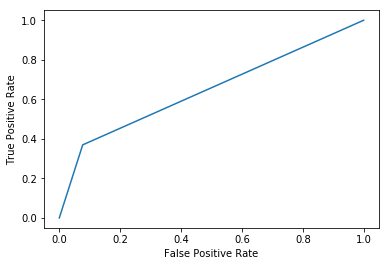

In [41]:
#fpr,tpr, _ = roc_curve(yt[acc.index(np.max(acc))],yp[acc.index(np.max(acc))]))
fpr,tpr, _ = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [42]:
#Ans : 64.63%

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [43]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []
rfm=RandomForestClassifier()

In [44]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [45]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7193333333333334
Standard deviation:  0.026407069760451155
